### Import Libraries and Data

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame=True)
iris.keys()
df = iris.frame
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.target.unique()

array([0, 1, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df['target_name'] = df['target'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica',
})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


### Data Analysis and Evaluation

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

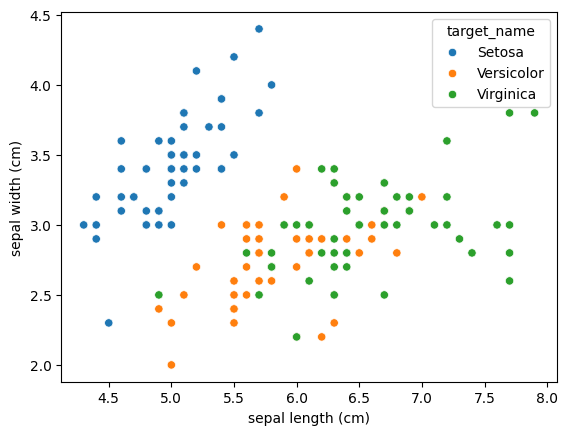

In [19]:
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target_name')
plt.show()

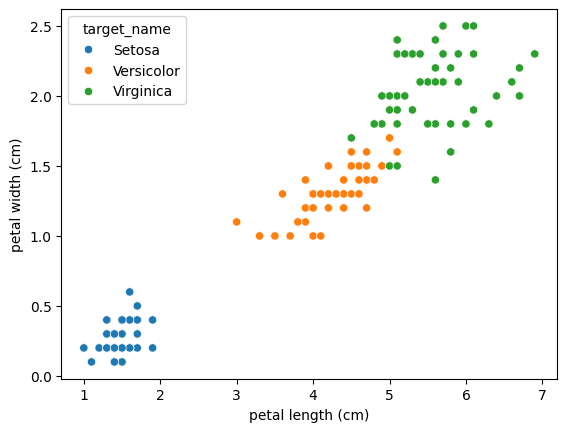

In [21]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target_name')
plt.show()

### Model Training

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_training, y_training)

y_pred = model.predict(X_test)

### Model Evaluation: Accuracy

In [31]:
accuracy_score(y_test, y_pred)

0.9777777777777777

### Model Evaluation: Precision, Recall, F1 Score

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Model Evaluation: Confusion Matrix

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

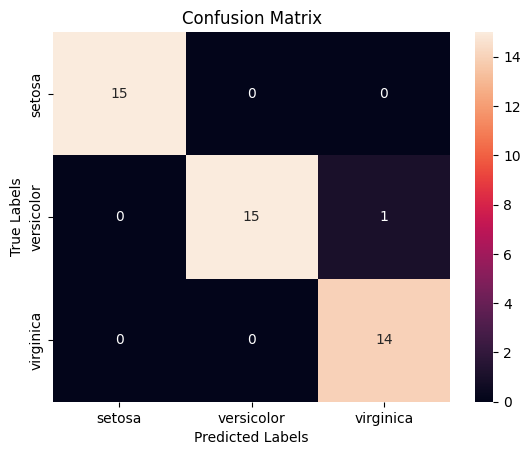

In [35]:
import seaborn as sns
classes = ['setosa', 'versicolor', 'virginica']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()